# Instalation

In [1]:
!pip install fvcore

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -q -e detectron2_repo
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 5.6 MB/s eta 0:00:00
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-jbnf1bqu
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-jbnf1bqu
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=379037 sha256=33bd91471316ccf795bc4ab92c2bc95e59e1d662ce816c1e6177801273bdcf86
  Stored in directory: /tmp/pip-ephem-wheel-cache-af40w3rz/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling py

In [3]:
from fvcore.common.file_io import PathManager
import os
import numpy as np
import xml.etree.ElementTree as ET

from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Uploading Dataset

In [6]:
CLASS_NAMES = ["deer", "wild_boar"]

In [7]:
def load_voc_instances(dir_name, split):
    with PathManager.open(split + ".txt") as f:
        file_ids = np.loadtxt(f, dtype=np.str)

    dicts = []
    for file_id in file_ids:
        anno_file = os.path.join(dir_name, "xml", file_id + ".xml")
        jpeg_file = os.path.join(dir_name, "photo", file_id + ".jpg")

        tree = ET.parse(anno_file)

        r = {
            "file_name": jpeg_file,
            "image_id": file_id,
            "height": int(tree.findall("./size/height")[0].text),
            "width": int(tree.findall("./size/width")[0].text),
        }
        instances = []

        for obj in tree.findall("object"):
            cls = obj.find("name").text
            bbox = obj.find("bndbox")
            bbox = [float(bbox.find(x).text) for x in ["xmin", "ymin", "xmax", "ymax"]]
            instances.append(
                {"category_id": CLASS_NAMES.index(cls), "bbox": bbox, "bbox_mode": BoxMode.XYXY_ABS}
            )
        r["annotations"] = instances
        dicts.append(r)
    return dicts


In [8]:
! cp /content/gdrive/MyDrive/Politechnika/Magisterka/dataset/CNN/FasterRCNN/FasterRCNN.zip ./
! cp /content/gdrive/MyDrive/Politechnika/Magisterka/dataset/CNN/FasterRCNN/test.txt ./
! cp /content/gdrive/MyDrive/Politechnika/Magisterka/dataset/CNN/FasterRCNN/train.txt ./

In [9]:
!unzip /content/FasterRCNN.zip -d ./

Archive:  /content/FasterRCNN.zip
   creating: ./FasterRCNN/photo/
  inflating: ./FasterRCNN/photo/deer_000001.jpg  
  inflating: ./FasterRCNN/photo/deer_000002.jpg  
  inflating: ./FasterRCNN/photo/deer_000003.jpg  
  inflating: ./FasterRCNN/photo/deer_000004.jpg  
  inflating: ./FasterRCNN/photo/deer_000005.jpg  
  inflating: ./FasterRCNN/photo/deer_000006.jpg  
  inflating: ./FasterRCNN/photo/deer_000007.jpg  
  inflating: ./FasterRCNN/photo/deer_000008.jpg  
  inflating: ./FasterRCNN/photo/deer_000009.jpg  
  inflating: ./FasterRCNN/photo/deer_000010.jpg  
  inflating: ./FasterRCNN/photo/deer_000011.jpg  
  inflating: ./FasterRCNN/photo/deer_000012.jpg  
  inflating: ./FasterRCNN/photo/deer_000013.jpg  
  inflating: ./FasterRCNN/photo/deer_000014.jpg  
  inflating: ./FasterRCNN/photo/deer_000015.jpg  
  inflating: ./FasterRCNN/photo/deer_000016.jpg  
  inflating: ./FasterRCNN/photo/deer_000017.jpg  
  inflating: ./FasterRCNN/photo/deer_000018.jpg  
  inflating: ./FasterRCNN/photo/d

In [10]:
datasetPATH = '/content/FasterRCNN'

In [11]:
load_voc_instances(datasetPATH, 'train')

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


[{'file_name': '/content/FasterRCNN/photo/deer_000001.jpg',
  'image_id': 'deer_000001',
  'height': 403,
  'width': 637,
  'annotations': [{'category_id': 0,
    'bbox': [257.0, 155.0, 374.0, 261.0],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>}]},
 {'file_name': '/content/FasterRCNN/photo/deer_000002.jpg',
  'image_id': 'deer_000002',
  'height': 229,
  'width': 197,
  'annotations': [{'category_id': 0,
    'bbox': [130.0, 83.0, 172.0, 104.0],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>}]},
 {'file_name': '/content/FasterRCNN/photo/deer_000003.jpg',
  'image_id': 'deer_000003',
  'height': 389,
  'width': 389,
  'annotations': [{'category_id': 0,
    'bbox': [110.0, 192.0, 159.0, 228.0],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>}]},
 {'file_name': '/content/FasterRCNN/photo/deer_000004.jpg',
  'image_id': 'deer_000004',
  'height': 389,
  'width': 389,
  'annotations': [{'category_id': 0,
    'bbox': [232.0, 167.0, 277.0, 215.0],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>},
   {'category_id': 0,
    '

In [12]:
def register_licenseplates_voc(name, dirname, split):
    DatasetCatalog.register(name,
                            lambda: load_voc_instances(dirname, split))
    MetadataCatalog.get(name).set(thing_classes=CLASS_NAMES,
                                  dirname=dirname,
                                  split=split)

In [13]:
dataset_name = "ThermalPhotosTrain"
register_licenseplates_voc(dataset_name, datasetPATH, "train")
dataset_dicts = DatasetCatalog.get(dataset_name)

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


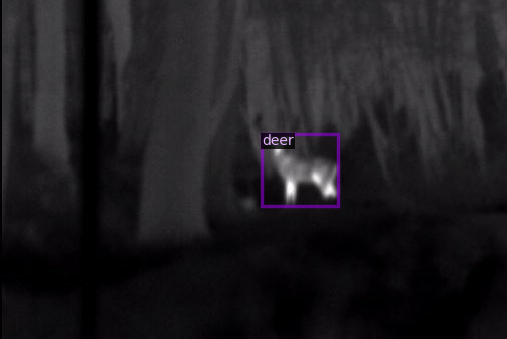

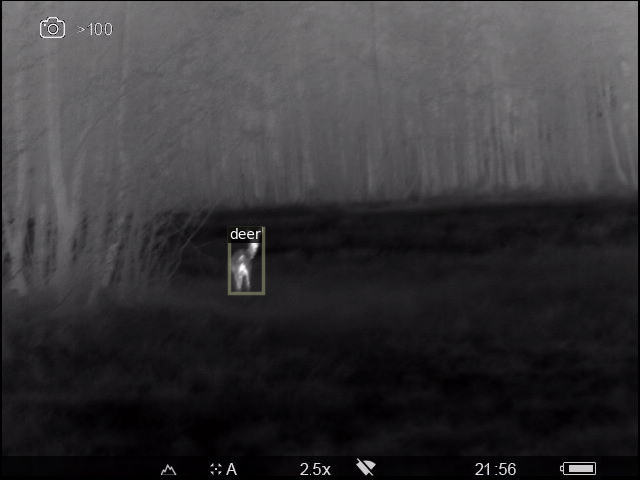

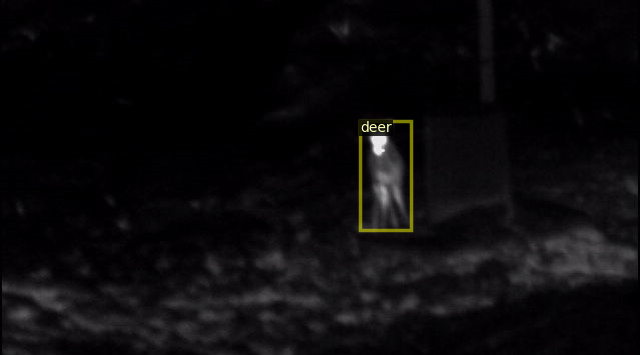

In [14]:
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1],
                            metadata=MetadataCatalog.get(dataset_name),
                            scale=1.0)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [15]:
dataset_name = "ThermalPhotosTest"
register_licenseplates_voc(dataset_name, datasetPATH, "test")
dataset_dicts = DatasetCatalog.get(dataset_name)

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


## Training

In [16]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.structures import BoxMode

In [17]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):
    if output_folder is None:
      os.makedirs("coco_eval", exist_ok=True)
      output_folder = "coco_eval"
    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [18]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("ThermalPhotosTrain",)
cfg.DATASETS.TEST = ("ThermalPhotosTest",)

cfg.DATALOADER.NUM_WORKERS = 4

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.005
cfg.SOLVER.MAX_ITER = 2000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

cfg.TEST.EVAL_PERIOD = 1000
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [19]:
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/17 14:06:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)
model_final_280758.pkl: 167MB [00:06, 27.4MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[09/17 14:07:01 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/17 14:07:22 d2.utils.events]:  eta: 0:28:39  iter: 19  total_loss: 1.677  loss_cls: 1.255  loss_box_reg: 0.4002  loss_rpn_cls: 0.007538  loss_rpn_loc: 0.007795    time: 0.8225  last_time: 0.7862  data_time: 0.0274  last_data_time: 0.0151   lr: 9.9905e-05  max_mem: 4688M
[09/17 14:07:42 d2.utils.events]:  eta: 0:28:49  iter: 39  total_loss: 0.7173  loss_cls: 0.3408  loss_box_reg: 0.3917  loss_rpn_cls: 0.00548  loss_rpn_loc: 0.006412    time: 0.8413  last_time: 0.9165  data_time: 0.0142  last_data_time: 0.0065   lr: 0.0001998  max_mem: 4866M
[09/17 14:08:00 d2.utils.events]:  eta: 0:28:38  iter: 59  total_loss: 0.7711  loss_cls: 0.287  loss_box_reg: 0.4665  loss_rpn_cls: 0.001583  loss_rpn_loc: 0.005392    time: 0.8552  last_time: 0.8729  data_time: 0.0147  last_data_time: 0.0095   lr: 0.0002997  max_mem: 4866M
[09/17 14:08:18 d2.utils.events]:  eta: 0:28:28  iter: 79  total_loss: 0.6696  loss_cls: 0.2167  loss_box_reg: 0.4508  loss_rpn_cls: 0.0007841  loss_rpn_loc: 0.005304    time:

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


[09/17 14:22:33 d2.evaluation.evaluator]: Inference done 11/32. Dataloading: 0.0009 s/iter. Inference: 0.1077 s/iter. Eval: 0.0003 s/iter. Total: 0.1090 s/iter. ETA=0:00:02
[09/17 14:22:35 d2.evaluation.evaluator]: Total inference time: 0:00:02.990516 (0.110760 s / iter per device, on 1 devices)
[09/17 14:22:35 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.107536 s / iter per device, on 1 devices)
[09/17 14:22:35 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/17 14:22:35 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[09/17 14:22:35 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/17 14:22:35 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/17 14:22:35 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/17 14:22:35 d2.evaluation

<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


[09/17 14:37:54 d2.evaluation.evaluator]: Inference done 11/32. Dataloading: 0.0013 s/iter. Inference: 0.1063 s/iter. Eval: 0.0003 s/iter. Total: 0.1078 s/iter. ETA=0:00:02
[09/17 14:37:56 d2.evaluation.evaluator]: Total inference time: 0:00:02.983165 (0.110488 s / iter per device, on 1 devices)
[09/17 14:37:56 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.106785 s / iter per device, on 1 devices)
[09/17 14:37:56 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/17 14:37:56 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[09/17 14:37:56 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/17 14:37:56 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/17 14:37:56 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/17 14:37:56 d2.evaluation

## Visualizing and checking results



[09/17 14:37:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


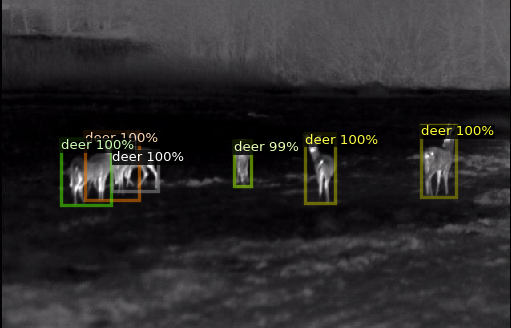

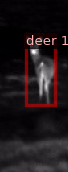

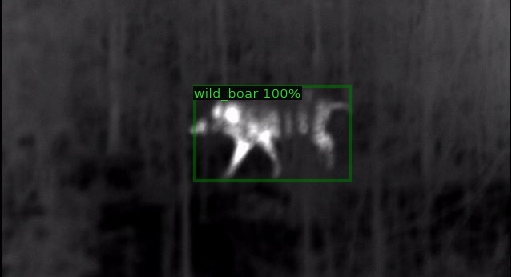

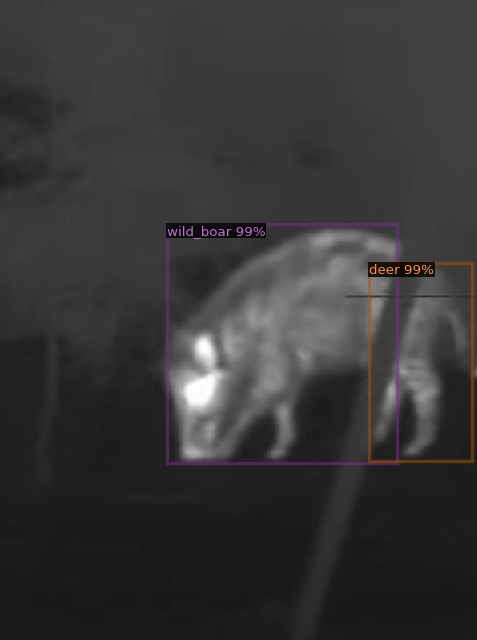

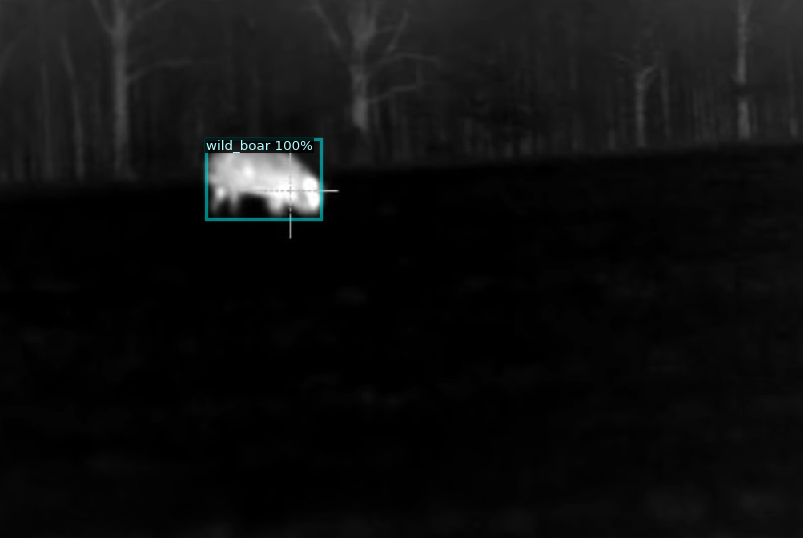

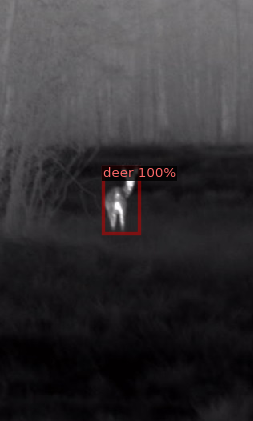

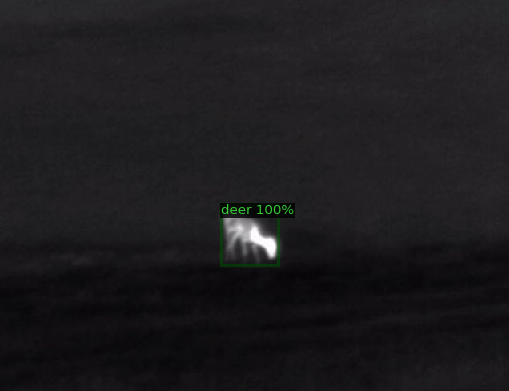

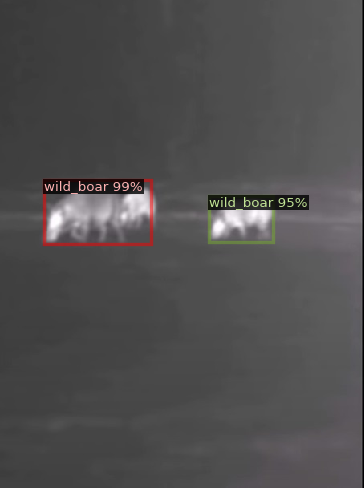

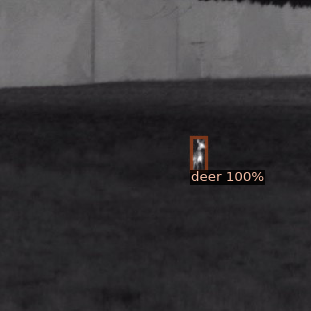

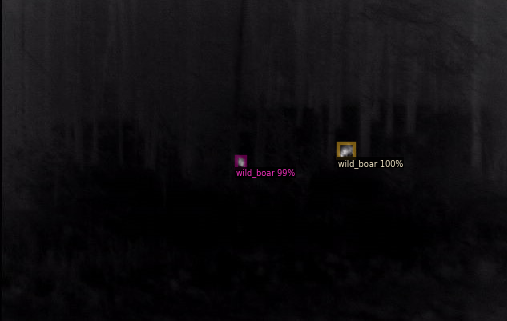

In [20]:
from detectron2.utils.visualizer import ColorMode

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75

cfg.DATASETS.TEST = ("ThermalPhotosTest", )

predictor = DefaultPredictor(cfg)
dataset_dicts = DatasetCatalog.get("ThermalPhotosTest")
board_metadata = MetadataCatalog.get("ThermalPhotosTest")

for d in random.sample(dataset_dicts, 10):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=board_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [21]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("ThermalPhotosTest", cfg, False, output_dir="/output/")
val_loader = build_detection_test_loader(cfg, "ThermalPhotosTest")

inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [09/17 14:37:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/17 14:37:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/17 14:37:59 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/17 14:37:59 d2.data.common]: Serializing 32 elements to byte tensors and concatenating them all ...
[09/17 14:37:59 d2.data.common]: Serialized dataset takes 0.01 MiB
[09/17 14:37:59 d2.evaluation.evaluator]: Start inference on 32 batches


<ipython-input-7-1068b4591a62>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_ids = np.loadtxt(f, dtype=np.str)


[09/17 14:38:01 d2.evaluation.evaluator]: Inference done 11/32. Dataloading: 0.0011 s/iter. Inference: 0.1079 s/iter. Eval: 0.0003 s/iter. Total: 0.1092 s/iter. ETA=0:00:02
[09/17 14:38:03 d2.evaluation.evaluator]: Total inference time: 0:00:02.987010 (0.110630 s / iter per device, on 1 devices)
[09/17 14:38:03 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.106910 s / iter per device, on 1 devices)
[09/17 14:38:03 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/17 14:38:03 d2.evaluation.coco_evaluation]: Saving results to /output/coco_instances_results.json
[09/17 14:38:03 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/17 14:38:03 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/17 14:38:03 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/17 14:38:03 d2.evaluation.f

OrderedDict([('bbox',
              {'AP': 67.02084618646529,
               'AP50': 91.32721153888787,
               'AP75': 77.47235880592574,
               'APs': 67.9950495049505,
               'APm': 58.19698419421775,
               'APl': 75.78064592173503,
               'AP-deer': 74.08727493870597,
               'AP-wild_boar': 59.954417434224624})])